In [42]:
import pandas as pd

# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('house_data_census.csv')

In [62]:
df = df[df.tracts != '0']

In [65]:
df

,field_1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,tracts,ESL_Score,Income_Sco,RE_Score,TotalScore,WeightedTo,PercentESL,MedianHous,PercentPOC
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,...,5650,Tract 011900,3,3,5,11,3.66667,14.9928,86603,76.03
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,...,7639,Tract 000200,3,4,3,10,3.33333,16.3803,67397,36.749
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,...,8062,Tract 022102,2,3,2,7,2.33333,8.37332,104053,27.6583
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,...,5000,Tract 011600,1,3,1,5,1.66667,1.20307,103835,13.944
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,...,7503,Tract 032317,2,1,1,4,1.33333,6.26308,162532,18.8858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0,...,1509,Tract 001300,3,4,3,10,3.33333,13.0707,70764,44.3375
21593,21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0,...,7200,Tract 026600,4,4,4,12,4,25.1044,64375,56.5135
21594,21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0,...,2007,Tract 008900,1,3,4,8,2.66667,2.39134,87250,50.3404
21595,21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0,...,1287,Tract 025006,2,1,3,6,2,7.20171,149704,38.2828


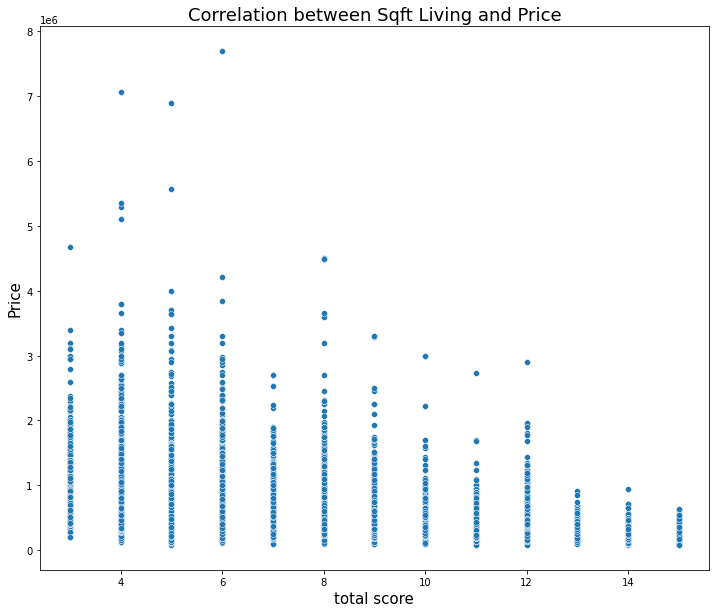

In [67]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['TotalScore'], y=df['price'], ax=ax)
ax.set_title('Correlation between Sqft Living and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('total score', fontsize=15);




In [119]:
df = df.replace('?', np.nan)

In [120]:
df.sqft_basement = df.sqft_basement.replace('?', np.nan)

In [121]:
df.sqft_basement = df.sqft_basement.astype(float)

In [122]:
df = df.replace(np.nan, '0')

In [123]:
X = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'yr_renovated', 'view', 'condition', 'grade', 'sqft_basement']]
y = df['price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [125]:
lr = LinearRegression()

In [126]:
lr.fit(X_train, y_train)

LinearRegression()

In [127]:
lr.score(X_test, y_test)

0.6808963454308357

In [128]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: 8566082.91964517
Slope: [ 9.21238469e+01  1.26590291e-01  2.14141204e+01 -4.13953385e-01
  8.99683831e+01  4.12372991e+04 -3.62553217e+04  5.98805622e+05
 -2.17341407e+05 -6.02197756e+02  4.78907580e+04 -2.64781066e+03
  3.26574863e+01  7.77228093e+04  2.57356974e+04  4.78907580e+04
  5.10712150e+01]


In [129]:
# Make predictions for train and test set
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)

In [130]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 203802.63728147774
Testing RMSE: 208338.26529896114


In [131]:
X_train = X_train.loc[y_train.index]

In [132]:
X_train

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,bathrooms,bedrooms,lat,long,zipcode,grade,yr_built,yr_renovated,view,condition,grade,sqft_basement
15981,1980,6250,1980,6250,1090,1.75,3,47.5540,-122.385,98136,7,1910,0,1,5,7,890.0
9576,3550,35689,3350,35711,3550,2.50,4,47.7503,-122.074,98077,9,1991,0,0,4,9,0.0
1212,2760,27631,2490,13158,1800,2.00,4,47.7484,-122.291,98155,8,1978,0,0,4,8,960.0
18840,800,6016,1470,3734,800,1.00,2,47.6913,-122.369,98117,6,1942,0,0,3,6,0.0
20748,1984,32400,1390,9152,1564,2.50,4,47.3600,-122.318,98198,8,1962,0,0,3,8,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,2230,5000,2090,4637,1650,2.50,4,47.4799,-122.129,98059,7,2006,0,0,3,7,580.0
11977,3260,11700,2860,11700,1630,2.75,5,47.6169,-122.104,98008,8,1964,0,0,3,8,1630.0
5397,2250,7882,1550,7508,1570,3.00,4,47.3703,-122.314,98198,8,1986,0,0,3,8,680.0
860,380,15000,1170,15000,380,0.75,1,47.4810,-122.323,98168,5,1963,0,0,3,5,0.0


In [133]:
X_train.sqft_basement = X_train.sqft_basement.replace('?', np.nan)

In [134]:
X_train.sqft_basement = X_train.sqft_basement.astype(float)

In [135]:
X_train['target'] = y_train

In [136]:
X_train.dtypes

sqft_living        int64
sqft_lot           int64
sqft_living15      int64
sqft_lot15         int64
sqft_above         int64
bathrooms        float64
bedrooms           int64
lat              float64
long             float64
zipcode            int64
grade              int64
yr_built           int64
yr_renovated      object
view              object
condition          int64
grade              int64
sqft_basement    float64
target             int64
dtype: object

In [137]:
X_train[(np.abs(stats.zscore(X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'target']])) < 3).all(axis=1)].drop_duplicates()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,bathrooms,bedrooms,lat,long,zipcode,grade,yr_built,yr_renovated,view,condition,grade,sqft_basement,target
15981,1980,6250,1980,6250,1090,1.75,3,47.5540,-122.385,98136,7,1910,0,1,5,7,890.0,564000
9576,3550,35689,3350,35711,3550,2.50,4,47.7503,-122.074,98077,9,1991,0,0,4,9,0.0,730000
1212,2760,27631,2490,13158,1800,2.00,4,47.7484,-122.291,98155,8,1978,0,0,4,8,960.0,500000
18840,800,6016,1470,3734,800,1.00,2,47.6913,-122.369,98117,6,1942,0,0,3,6,0.0,405000
20748,1984,32400,1390,9152,1564,2.50,4,47.3600,-122.318,98198,8,1962,0,0,3,8,420.0,380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,2730,3560,1860,3560,1550,2.75,4,47.6737,-122.304,98115,8,1921,0,0,3,8,1180.0,885000
11296,2230,5000,2090,4637,1650,2.50,4,47.4799,-122.129,98059,7,2006,0,0,3,7,580.0,448000
11977,3260,11700,2860,11700,1630,2.75,5,47.6169,-122.104,98008,8,1964,0,0,3,8,1630.0,681500
5397,2250,7882,1550,7508,1570,3.00,4,47.3703,-122.314,98198,8,1986,0,0,3,8,680.0,250000


In [163]:
df.columns

Index(['field_1', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'tracts',
       'ESL_Score', 'Income_Sco', 'RE_Score', 'TotalScore', 'WeightedTo',
       'PercentESL', 'MedianHous', 'PercentPOC'],
      dtype='object')

In [169]:
X = df.drop(['price', 'date', 'tracts'], axis = 1)
y = df['price']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [186]:
X_train['target'] = y_train
X_train_no = X_train[(np.abs(stats.zscore(X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'target']])) < 3).all(axis=1)].drop_duplicates()
y_train_no = X_train_no['target']
X_train_no = X_train_no.drop('target', axis = 1)


<ipython-input-186-5e35db3e1a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['target'] = y_train


In [172]:
lr = LinearRegression()

In [173]:
lr.fit(X_train_no, y_train_no)

LinearRegression()

In [174]:
lr.score(X_test, y_test)

0.6638956173676298

In [175]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: -15255494.35891471
Slope: [ 8.59324266e-01 -8.69224152e-07 -1.30129035e+04  2.67336994e+04
  9.26584321e+01  3.35449605e-01  2.18449313e+04  2.27709699e+05
  4.22393519e+04  2.34275287e+04  7.22849180e+04  9.71696953e+00
  4.30814195e+00 -1.90706357e+03  2.08013649e+01 -2.89845364e+02
  4.25242785e+05 -2.16822573e+05  1.92777143e+01 -1.48835305e+00
 -1.62339801e+04  1.95383894e+04  6.28610359e+02  3.93301971e+03
  1.31102717e+03  1.25600467e+03  2.58018333e+00 -6.57497131e+02]


In [176]:
# Make predictions for train and test set
train_preds1 = lr.predict(X_train_no)
test_preds1 = lr.predict(X_test)

In [177]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_no, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 127709.23034277829
Testing RMSE: 213816.020593594


In [184]:
# Isolate the features for the first model
model_1_train = X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'condition', 'grade', 'PercentESL', 'MedianHous', 'PercentPOC']]

model_1_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'condition', 'grade', 'PercentESL', 'MedianHous', 'PercentPOC']]

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)

# Generate training and test predictions
train_preds2 = model1.predict(model_1_train)
test_preds2 = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds2)
test_error = mean_squared_error(y_test, test_preds2)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds2))))

Train error: 41594127027.1385
Test error: 42840485632.55603
Difference: 1246358605.4175339
Training RMSE: 203946.38272629032
Testing RMSE: 206979.43287330755


In [148]:
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the first model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds3 = model.predict(model_train)
    test_preds3 = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds)
    test_error = mean_squared_error(y_test, test_preds)
    
    # What is the difference in training and test error?
    difference = test_error - train_error
    print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds3))))
    print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds3))))
    # return results
    return train_error, test_error, difference

second_model_features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms']
model_2_results = model(X_train, X_test, y_train, y_test, second_model_features)
model_2_results


NameError: name 'train_preds' is not defined

In [149]:
# Isolate the features for the first model
model_3_train = X_train_no[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

model_3_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

# Initialize a model
model3 = LinearRegression()

# Fit the model
model3.fit(model_3_train, y_train_no)

# Generate training and test predictions
train_preds3 = model3.predict(model_3_train)
test_preds3 = model3.predict(model_3_test)

# Calculate training and test error
train_error = mean_squared_error(y_train_no, train_preds3)
test_error = mean_squared_error(y_test, test_preds3)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_no, train_preds3))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds3))))

Train error: 25220856971.096813
Test error: 58471747826.66187
Difference: 33250890855.56506
Training RMSE: 158810.75836068793
Testing RMSE: 241809.3212154194


In [150]:
# Isolate the features for the first model
model_4_train = X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

model_4_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

# Initialize a model
model4 = LinearRegression()

# Fit the model
model4.fit(model_4_train, y_train)

# Generate training and test predictions
train_preds4 = model4.predict(model_4_train)
test_preds4 = model4.predict(model_4_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds4)
test_error = mean_squared_error(y_test, test_preds4)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds4))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds4))))

Train error: 50163114388.602036
Test error: 51093854961.3634
Difference: 930740572.7613678
Training RMSE: 223971.2356277074
Testing RMSE: 226039.4986752612
